In [1]:
import os
import xarray as xr
import numpy as np
import cftime

from osprey.actions.forecaster import forecaster_EOFS
from osprey.means.eof import preproc_pattern_3D, preproc_timeseries_3D, preproc_forecast_3D
from osprey.actions.reader import reader_rebuilt, reader_nemo, preproc_nemo
from osprey.utils.folders import folders
from osprey.means.eof import save_EOF
from osprey.utils.time import get_startleg, get_year, get_forecast_year
from osprey.utils import cdo

In [2]:
expname = "lfr0"
var = "thetao"
ndim ="3D"
endleg = 71
yearspan = 10
yearleap = 10

In [3]:
startleg = get_startleg(endleg, yearspan)
startyear = get_year(startleg)
endyear = get_year(endleg)
window = endyear - startyear
# forecast year
foreyear = get_forecast_year(endyear, yearleap)
fdate = cftime.DatetimeGregorian(foreyear, 1, 1, 0, 0, 0, has_year_zero=False)
xf = xr.DataArray(data = np.array([fdate]), dims = ['time'], coords = {'time': np.array([fdate])}, attrs = {'stardand_name': 'time', 'long_name': 'Time axis', 'bounds': 'time_counter_bnds', 'axis': 'T'})

In [4]:
dirs = folders(expname)

In [5]:
cdo.merge(expname, startyear, endyear)


/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lat_grid_T_inner<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lon_grid_T_inner<
cdi  warning (find_time_vars): Found more than one time variable, skipped variable time_centered!
cdi  warning (cdfInqContents): Coordinates variable time_centered can't be assigned!
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lat_grid_T_inner<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lon_grid_T_inner<
cdi  warning (find_time_vars): Found more than one time variable, skipped variable time_centered!
cdi  warning (cdfInqContents): Coord

In [6]:
cdo.selname(expname, startyear, endyear, var)


/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'



In [7]:
cdo.detrend(expname, startyear, endyear, var)

cdo    sub: Filling up stream2 >(pipe1.4)< by copying the first timestep.

/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'



In [8]:
cdo.get_EOF(expname, startyear, endyear, var, ndim)

File /ec/res4/scratch/itas/martini/lfr0/071/thetao_variance_2050-2059.nc not found. Unable to remove.
File /ec/res4/scratch/itas/martini/lfr0/071/thetao_pattern_2050-2059.nc not found. Unable to remove.

/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'


/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'



In [5]:
pattern = xr.open_mfdataset(os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_pattern_{startyear}-{endyear}.nc"), use_cftime=True, preprocess=preproc_pattern_3D)

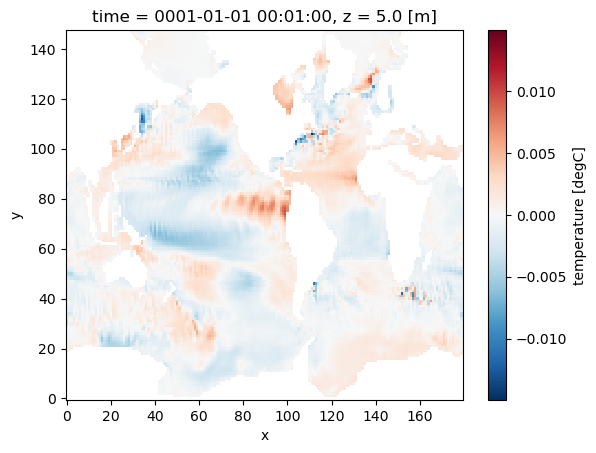

In [6]:
pattern['thetao'].isel(time=0,z=0).plot()

In [7]:
i=0
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_timeseries_{startyear}-{endyear}_0000{i}.nc")
timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_timeseries_3D)
timeseries

<xarray.Dataset> Size: 1kB
Dimensions:  (time: 9, lon: 1, lat: 1, z: 31)
Coordinates:
  * time     (time) object 72B 2050-07-01 06:00:00 ... 2058-07-01 06:00:00
  * lon      (lon) float64 8B 0.0
  * lat      (lat) float64 8B 0.0
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Data variables:
    thetao   (time, z, lat, lon) float32 1kB dask.array<chunksize=(1, 31, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    timeStamp:    2024-Apr-12 23:02:21 GMT
    uuid:         540af229-86bb-46da-8df1-cac216a2aa76
    history:      Mon Jun 17 08:14:53 2024: cdo eofcoeff /ec/res4/scratch/ita...
    frequency:    year
    CDO:          Climate Data Operators version 2.4.1 (https://mpimet.mpg.de...

In [8]:
field = pattern.isel(time=0)*0
for i in range(9):
    filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_timeseries_{startyear}-{endyear}_0000{i}.nc")
    timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_timeseries_3D)
    p = timeseries.polyfit(dim='time', deg=1, skipna = True)
    #theta = xr.polyval(timeseries['time'].isel(time=-1), p[f"{var}_polyfit_coefficients"])
    theta = timeseries['thetao'].isel(time=-1)
    laststep = pattern.isel(time=i)
    field = field + theta.isel(lat=0,lon=0)*laststep

In [9]:
field

<xarray.Dataset> Size: 4MB
Dimensions:  (y: 148, x: 180, z: 31)
Coordinates:
    time     object 8B 0001-01-01 00:01:00
    lon      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lat      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    thetao   (z, y, x) float32 3MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>

In [10]:
save_EOF(expname, startyear, endyear, field, var, ndim)

File /ec/res4/scratch/itas/martini/lfr0/071/thetao_product_2050-2059.nc successfully removed.


In [11]:
cdo.retrend(expname, startyear, endyear, var)

File /ec/res4/scratch/itas/martini/lfr0/071/thetao_forecast_2050-2059.nc successfully removed.

/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - time_counter_bnds
cdi  warning (cdfInqContents): Coordinates variable time_counter can't be assigned!



In [12]:
gdata = xr.open_mfdataset(os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_forecast_{startyear}-{endyear}.nc"), use_cftime=True, preprocess=preproc_forecast_3D)

In [13]:
gdata = gdata.rename({'time_counter': 'time', 'nav_lev': 'z'})

In [14]:
gdata

<xarray.Dataset> Size: 4MB
Dimensions:  (time: 1, y: 148, x: 180, z: 31)
Coordinates:
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
  * time     (time) int64 8B 0
Dimensions without coordinates: y, x
Data variables:
    nav_lon  (time, y, x) float32 107kB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    nav_lat  (time, y, x) float32 107kB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    thetao   (time, z, y, x) float32 3MB dask.array<chunksize=(1, 1, 148, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jun 18 13:34:20 2024: cdo add /ec/res4/scratch/itas/mar...
    CDO:          Climate Data Operators version 2.4.1 (https://mpimet.mpg.de...

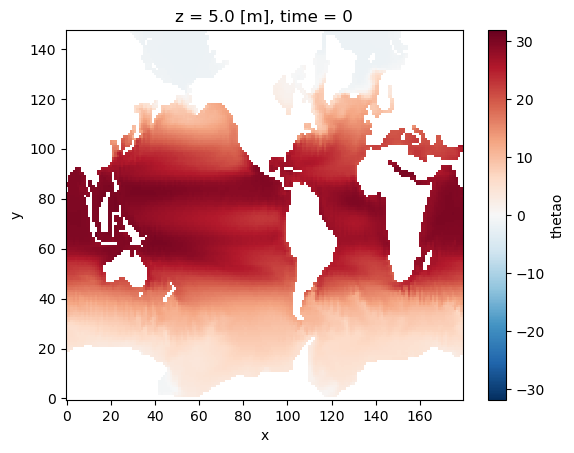

In [15]:
gdata['thetao'].isel(time=0,z=0).plot()

In [16]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_{startyear}-{endyear}.nc")
data = xr.open_mfdataset(filename, use_cftime=True)
data

<xarray.Dataset> Size: 30MB
Dimensions:            (time_counter: 9, bnds: 2, y_grid_T: 148, x_grid_T: 180,
                        deptht: 31)
Coordinates:
  * time_counter       (time_counter) object 72B 2050-07-01 06:00:00 ... 2058...
    nav_lon_grid_T     (y_grid_T, x_grid_T) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lat_grid_T     (y_grid_T, x_grid_T) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * deptht             (deptht) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
Dimensions without coordinates: bnds, y_grid_T, x_grid_T
Data variables:
    time_counter_bnds  (time_counter, bnds) object 144B dask.array<chunksize=(1, 2), meta=np.ndarray>
    deptht_bnds        (deptht, bnds) float32 248B dask.array<chunksize=(31, 2), meta=np.ndarray>
    thetao             (time_counter, deptht, y_grid_T, x_grid_T) float32 30MB dask.array<chunksize=(1, 1, 148, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    timeStamp:    2024-Apr-12 23:02:21 GMT
    uuid:         540af229-86bb-46da-8df1-cac216a2aa76
    history:      Mon Jun 17 08:14:37 2024: cdo yearmean -selname,thetao /ec/...
    frequency:    year
    CDO:          Climate Data Operators version 2.4.1 (https://mpimet.mpg.de...

In [17]:
data = data.rename_dims({"x_grid_T": 'x', "y_grid_T": 'y'})
data = data.rename({'time_counter': 'time', 'deptht': 'z'})
data = data.rename({'nav_lon_grid_T': 'lon', 'nav_lat_grid_T': 'lat'})
data = data.drop_vars(['time_counter_bnds','deptht_bnds'], errors='ignore')
data = data.drop_dims(['bnds'], errors='ignore')

In [18]:
data

<xarray.Dataset> Size: 30MB
Dimensions:  (time: 9, y: 148, x: 180, z: 31)
Coordinates:
  * time     (time) object 72B 2050-07-01 06:00:00 ... 2058-07-01 06:00:00
    lon      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lat      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    thetao   (time, z, y, x) float32 30MB dask.array<chunksize=(1, 1, 148, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    timeStamp:    2024-Apr-12 23:02:21 GMT
    uuid:         540af229-86bb-46da-8df1-cac216a2aa76
    history:      Mon Jun 17 08:14:37 2024: cdo yearmean -selname,thetao /ec/...
    frequency:    year
    CDO:          Climate Data Operators version 2.4.1 (https://mpimet.mpg.de...

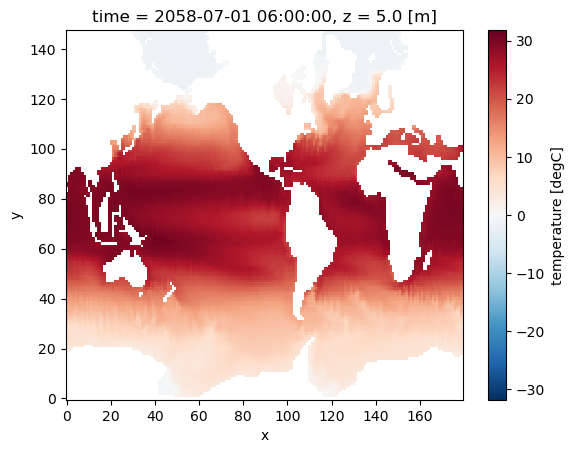

In [20]:
data['thetao'].isel(time=-1,z=0).plot()

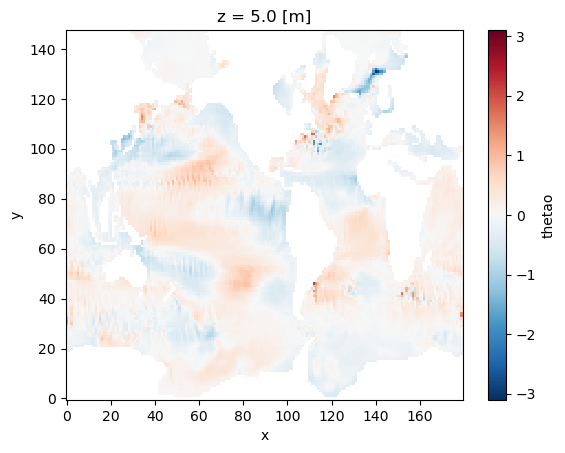

In [19]:
delta = data['thetao'].isel(time=-1,z=0) -gdata['thetao'].isel(time=0,z=0)
delta.plot()

In [18]:
data = reader_nemo(expname, endyear, endyear)

In [19]:
data

<xarray.Dataset> Size: 143MB
Dimensions:      (y: 148, x: 180, z: 31, time: 12)
Coordinates:
    lat          (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lon          (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z            (z) float32 124B 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
  * time         (time) object 96B 2059-01-16 12:00:00 ... 2059-12-16 12:00:00
Dimensions without coordinates: y, x
Data variables: (12/22)
    e3t          (time, z, y, x) float32 40MB dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    thetao       (time, z, y, x) float32 40MB dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so           (time, z, y, x) float32 40MB dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    tos          (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sos          (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    zos          (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    ...           ...
    qt_oce       (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx          (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum         (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp       (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip       (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre      (time, y, x) float32 1MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
Attributes:
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-13 00:07:42 GMT
    uuid:         b7ae78de-bb77-41af-9129-8b8cc70bd43e

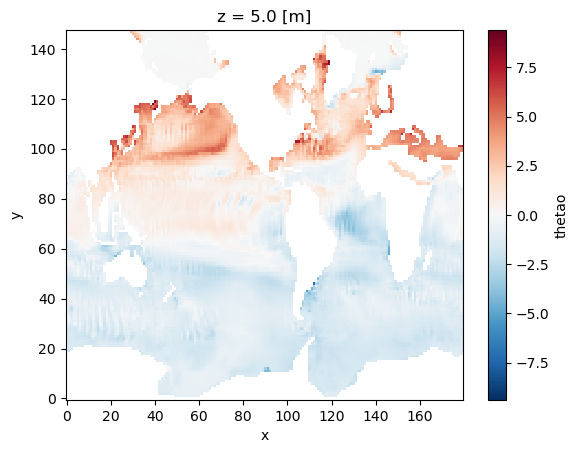

In [25]:
delta = data['thetao'].isel(time=6,z=0) -gdata['thetao'].isel(time=0,z=0)
delta.plot()

In [21]:
thetafit['tn'].isel(nav_lev=0).plot(vmin=-2, vmax=35)

NameError: name 'thetafit' is not defined

In [ ]:
rdata = reader_rebuilt(expname, endleg, endleg)

In [ ]:
var='tn'
delta = rdata[var]-thetafit[var]
delta.isel(nav_lev=0).plot(vmin=-2, vmax=35)